In [1]:
import pandas as pd

metadata_path = '../data/raw/HAM10000_metadata.csv'
metadata = pd.read_csv(metadata_path)

metadata.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


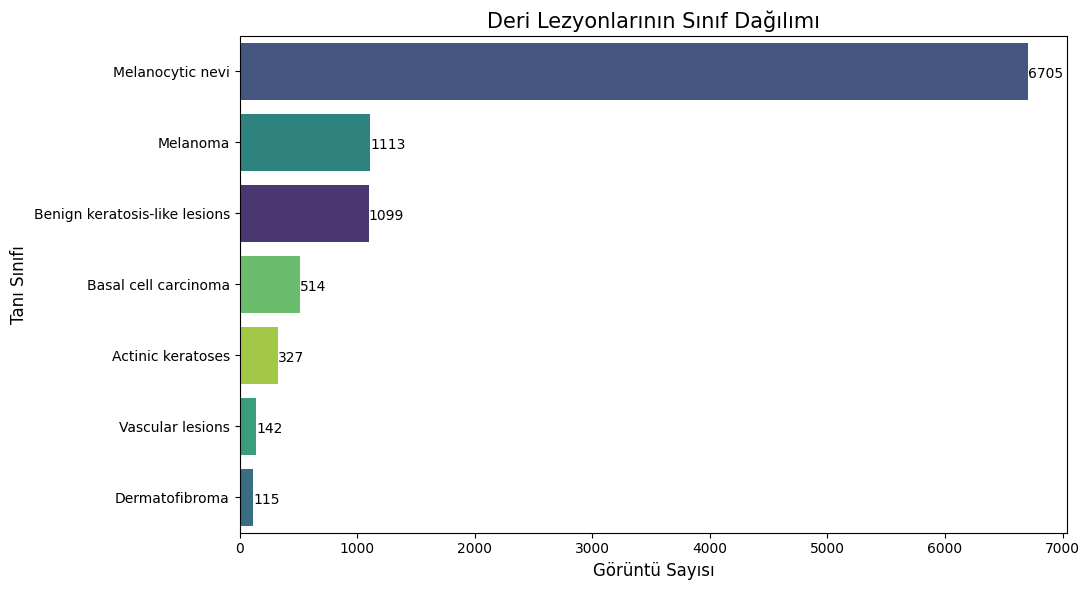

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

metadata['cell_type'] = metadata['dx'].map(lesion_type_dict)

plt.figure(figsize=(11, 6))
ax = sns.countplot(y='cell_type', 
                   data=metadata, 
                   order=metadata['cell_type'].value_counts().index, 
                   palette='viridis', 
                   hue='cell_type')

plt.title('Deri Lezyonlarının Sınıf Dağılımı', fontsize=15)
plt.xlabel('Görüntü Sayısı', fontsize=12)
plt.ylabel('Tanı Sınıfı', fontsize=12)

for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + 0.5))

plt.tight_layout()
plt.show()